In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
random.seed(4)

In [37]:
w0 = -0.3
w1 = 0.5
mean = 0
variance = 0.04
sigma = math.sqrt(variance)
beta = 1/variance


# choosing 10 sample points between -1 and 1
x_i = np.linspace(-1,1,10)

# f(x,a) = a0 + a1*x
# where a0 = -0.3 and a1 = 0.5
# We evaluate f(xn, a) and add gaussian noise (epsilon) to it in order to obtain tn
a = np.ones(10)
# generates 10x2 matrix of the form [1 x] for x in x_n 
x_n = np.dstack((a, x_i))
w_vals = np.array([w0, w1])
# y= w @ transpose(x)
y_i = w_vals @ x_n[0].T

# w = [w0, w1]
# t = y(w,x) + epsilon
# epsilon ~ N(0, beta_inverse)
# t is 1x10 target matrix 
t = y_i + np.random.normal(0, 0.2)


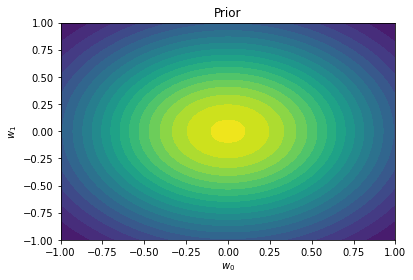

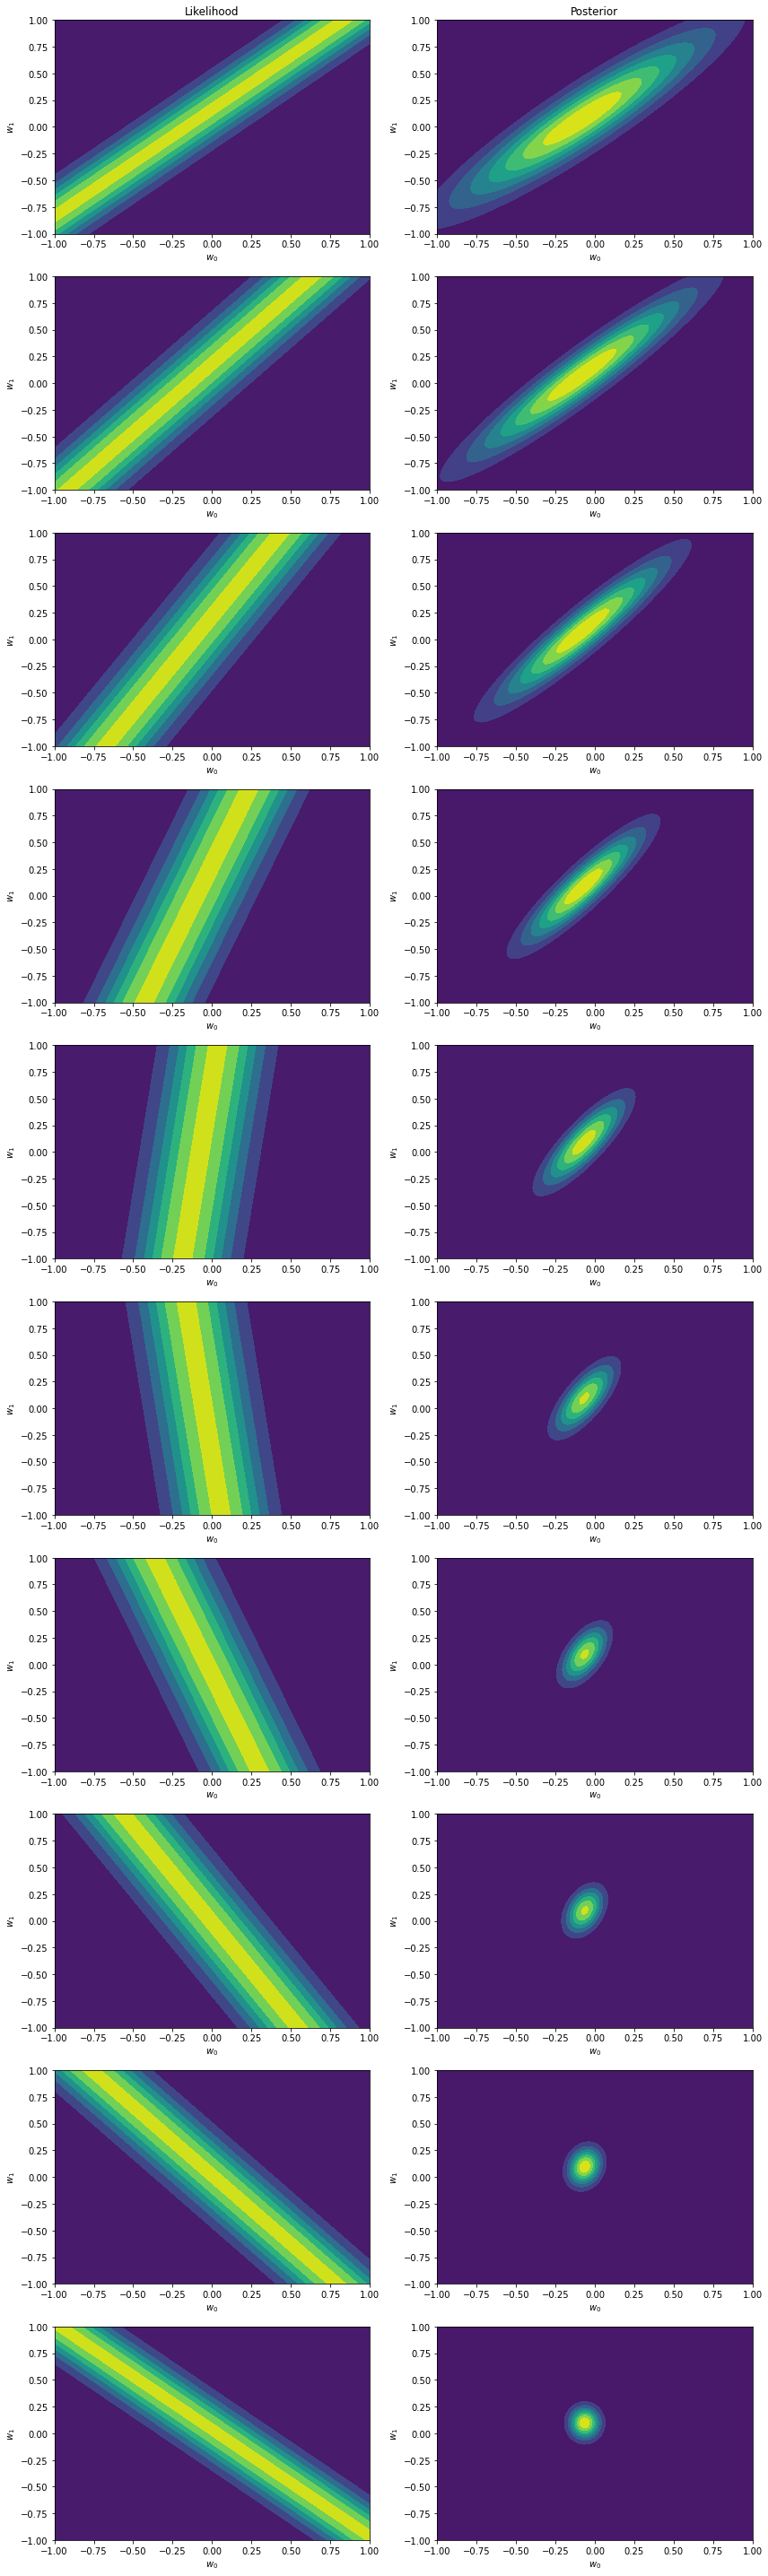

In [38]:
# GIVEN: PRIOR GAUSSIAN DISTRIBUTION WITH MEAN = 0 VARIANCE = 0.5
# Formula: p(w) = N(w|m0,S0), m0=mean, S0 = covariance
n = 10              # number of samples
mean = 0
variance = 0.5
alpha = 1/variance
m0 = np.array([0,0])
S0 = (1/alpha)*np.identity(2)
# 10 values of w1 and w0 between -1, 1
w = np.linspace(-1, 1, 100)
# 10 10x2 matrices of the form [w; w[i]] for i in range(n)

W = np.dstack(np.meshgrid(w, w))

# Getting the values of prior gaussian distribution
prior = stats.multivariate_normal.pdf(W, m0, S0)

# Plotting graph for prior dist in w space
plt.contourf(w, w, prior,20)
plt.title("Prior")
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')


def likelihood(x,w,y):
  const = 0.2*(np.sqrt(np.pi*2))
  return const*np.exp(-0.5*(y-(w @ x)/0.2)**2)


fig, axs = plt.subplots(n, 2, figsize=(12,40))
axs[0,0].set_title("Likelihood")
axs[0,1].set_title("Posterior")

for i in range(n):
  
  l = likelihood(x_n[0][i], W, t[i])
  posterior = prior * l[:,:]
  prior = posterior
  axs[i,0].contourf(w,w, l[:,:])
  axs[i,1].contourf(w,w, posterior)
  axs[i,0].set_xlabel("$w_0$")
  axs[i,1].set_xlabel("$w_0$")
  axs[i,0].set_ylabel("$w_1$")
  axs[i,1].set_ylabel("$w_1$")
fig.tight_layout()
